## Introducción
El TFT es un juego creado por Riot el cual ha ido creciendo conforme ha ido pasando el tiempo, pero debido a su complejidad de cara al jugador nuevo puede llegar a ser un tanto confuso y tedioso sus mecanicas. debido a esto he decidido crear este modelo de prediccion de partdas que ayudara al jugadar a comprender de manera mas didactica el Meta, esto hara que el aprendizaje sea mas llevadero

Antes de iniciar es conveniente expllicar las reglas del juego para que la explicacion sea mas amena.

### Reglas:

-Las fichas que esten en el tablero no las controlaras, solo las posicionaras y ellas actuaran por su cuenta

-Cada ficha cuenta con un atributo, el cual si juntas una cierta cantidad de ese mismo tipo se activara un potenciador (dependiendo de las fichas tendran uno o mas) estas sinergias son acumulables.

-Para ganar el juego debes ser el ultimo que sobrevive en la mesa, todos parten con 100 puntos de vida y esta va bajando conforme vas perdiendo, el daño vendra en funcion a cuantas fichas el ganador se haya quedado.

-Las fichas se compran con el oro que vas ganando por cada ronda, la cantidad variara segun la racha de victoria y derrotas que tengas, y hay que tener en cuenta que cada tres fichas del mismo tipo la ficha asciende.

- Durante ciertas etapas de la partida se ofrecera un "Aumento" el cual otorgara un buff o ventaja que variara en tres tipos:

    -Economica --> facilita la obtencion de dinero o te lo da de una vez
    
    -Combate --> fortalece tus fichas de alguna manera u otra

    -Sinergicas --> otorga sinergias a tu equipo

-Las fichas van apareciendo por rareza y conforme avanza el juego las mas raras se van haciendo mas frecuentes, si bien esto le agrega un factor de "suerte" los jugadores tratan de optimizar sus jugadas para que la probabilidad este en su favor.

### Lbrerias

In [1]:
from utils import *
from train import *
from prediction import *
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_csv('Data/Train.csv')
path='Data/Train.csv'
data_train.head(8)

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,...,TFT7_Yasuo_item1,TFT7_Yasuo_item2,TFT7_Yone,TFT7_Yone_item0,TFT7_Yone_item1,TFT7_Yone_item2,TFT7_Zoe,TFT7_Zoe_item0,TFT7_Zoe_item1,TFT7_Zoe_item2
0,3,NA1_4371790614,TFT6_Augment_PortableForge,TFT6_Augment_Weakspot,TFT6_Augment_CyberneticImplants2,NaN,NaN,1.0,NaN,1.0,...,ShimmerscaleDravensAxe,MadredsBloodrazor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NA1_4371790614,TFT6_Augment_PortableForge,TFT6_Augment_CelestialBlessing1,TFT7_Augment_BigFriend2,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NA1_4371790614,TFT7_Augment_AxiomArc2,TFT6_Augment_SecondWind1,TFT6_Augment_CyberneticImplants2,NaN,0.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NA1_4371790614,TFT7_Augment_ShapeshifterBeastsDen,TFT6_Augment_CelestialBlessing1,TFT6_Augment_PortableForge,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NA1_4371790614,TFT6_Augment_Electrocharge2,TFT6_Augment_TinyTitans,TFT7_Augment_RagewingEmblem,NaN,NaN,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NA1_4371790614,TFT6_Augment_LudensEcho2,TFT6_Augment_SecondWind1,TFT7_Augment_MageEmblem,NaN,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,GuinsoosRageblade,SpearOfShojin,StatikkShiv
6,8,NA1_4371790614,TFT6_Augment_CelestialBlessing2,TFT6_Augment_Weakspot,TFT7_Augment_AssassinEmblem,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,NA1_4371790614,TFT7_Augment_GadgetExpert,TFT6_Augment_CelestialBlessing1,TFT6_Augment_Diversify2,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El data set que se uso fue sacado de kagle y contiene multiples variables, las cuales se dividen en 5 grandes grupos:
- Posicionamiento: lugar que quedo al terminar ls partida. (la cual se predicira)
- Aumento: potenciadores adquiridos a lo largo de la partida.
- Sinergias: sinergias que habian entre todos los personajes de su tablero.
- Personajes: Personajes que el jugador tenia en su tablero.
- Items: Items que tiene cada personaje en tablero.

El dataset tiene un tamaño de 49 144 filas por 269 columnas

Para poder hacer el analisis exploratorio primero es necesario  limpiar el dataset

In [3]:
limpieza(show=True)

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,...,TrainerDragon_item,Tristana_item,Twitch_item,Varus_item,Vladimir_item,Volibear_item,Xayah_item,Yasuo_item,Yone_item,Zoe_item
0,1,1,1,1,1,0.0,0.0,1.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,1,1,1,1,1.0,0.0,1.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,3,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
5,0,1,1,1,3,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0,1,1,1,3,2.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Para comenzar es bueno hacer un gráfico de correlacion, para ver las relaciones que existen entre las variables:
- se puede ver que la variable que se va a estudiar no tiene ninguna correlacion especialmente alta con alguna sinergia,esto se debe a la cantidad que hay de estas y que se van combinando la una con las otras.
- si bien no hay alguna especialmente alta, si hay varias que son muy bajas, esto se puede dar por diversos motivos:
    - por que no se ajusta al meta, es decir que las fichas que en ese momento se juegan son counter directo a las habilidades que esta sinergia ofrece.
    - por que no tiene flexibilidad a la hora del juego, es decir las posibles salidas de la compocision son escasas y es poco probable que "hitees" las fichas que buscas (un ejemplo de estas son aquellas que tienen una alta correlacion)
- aquellas sinergias que poseen una gran correlacion con el posicionamiento suele ser por lo contratio, tienen buenas combinaciones y versatilidad

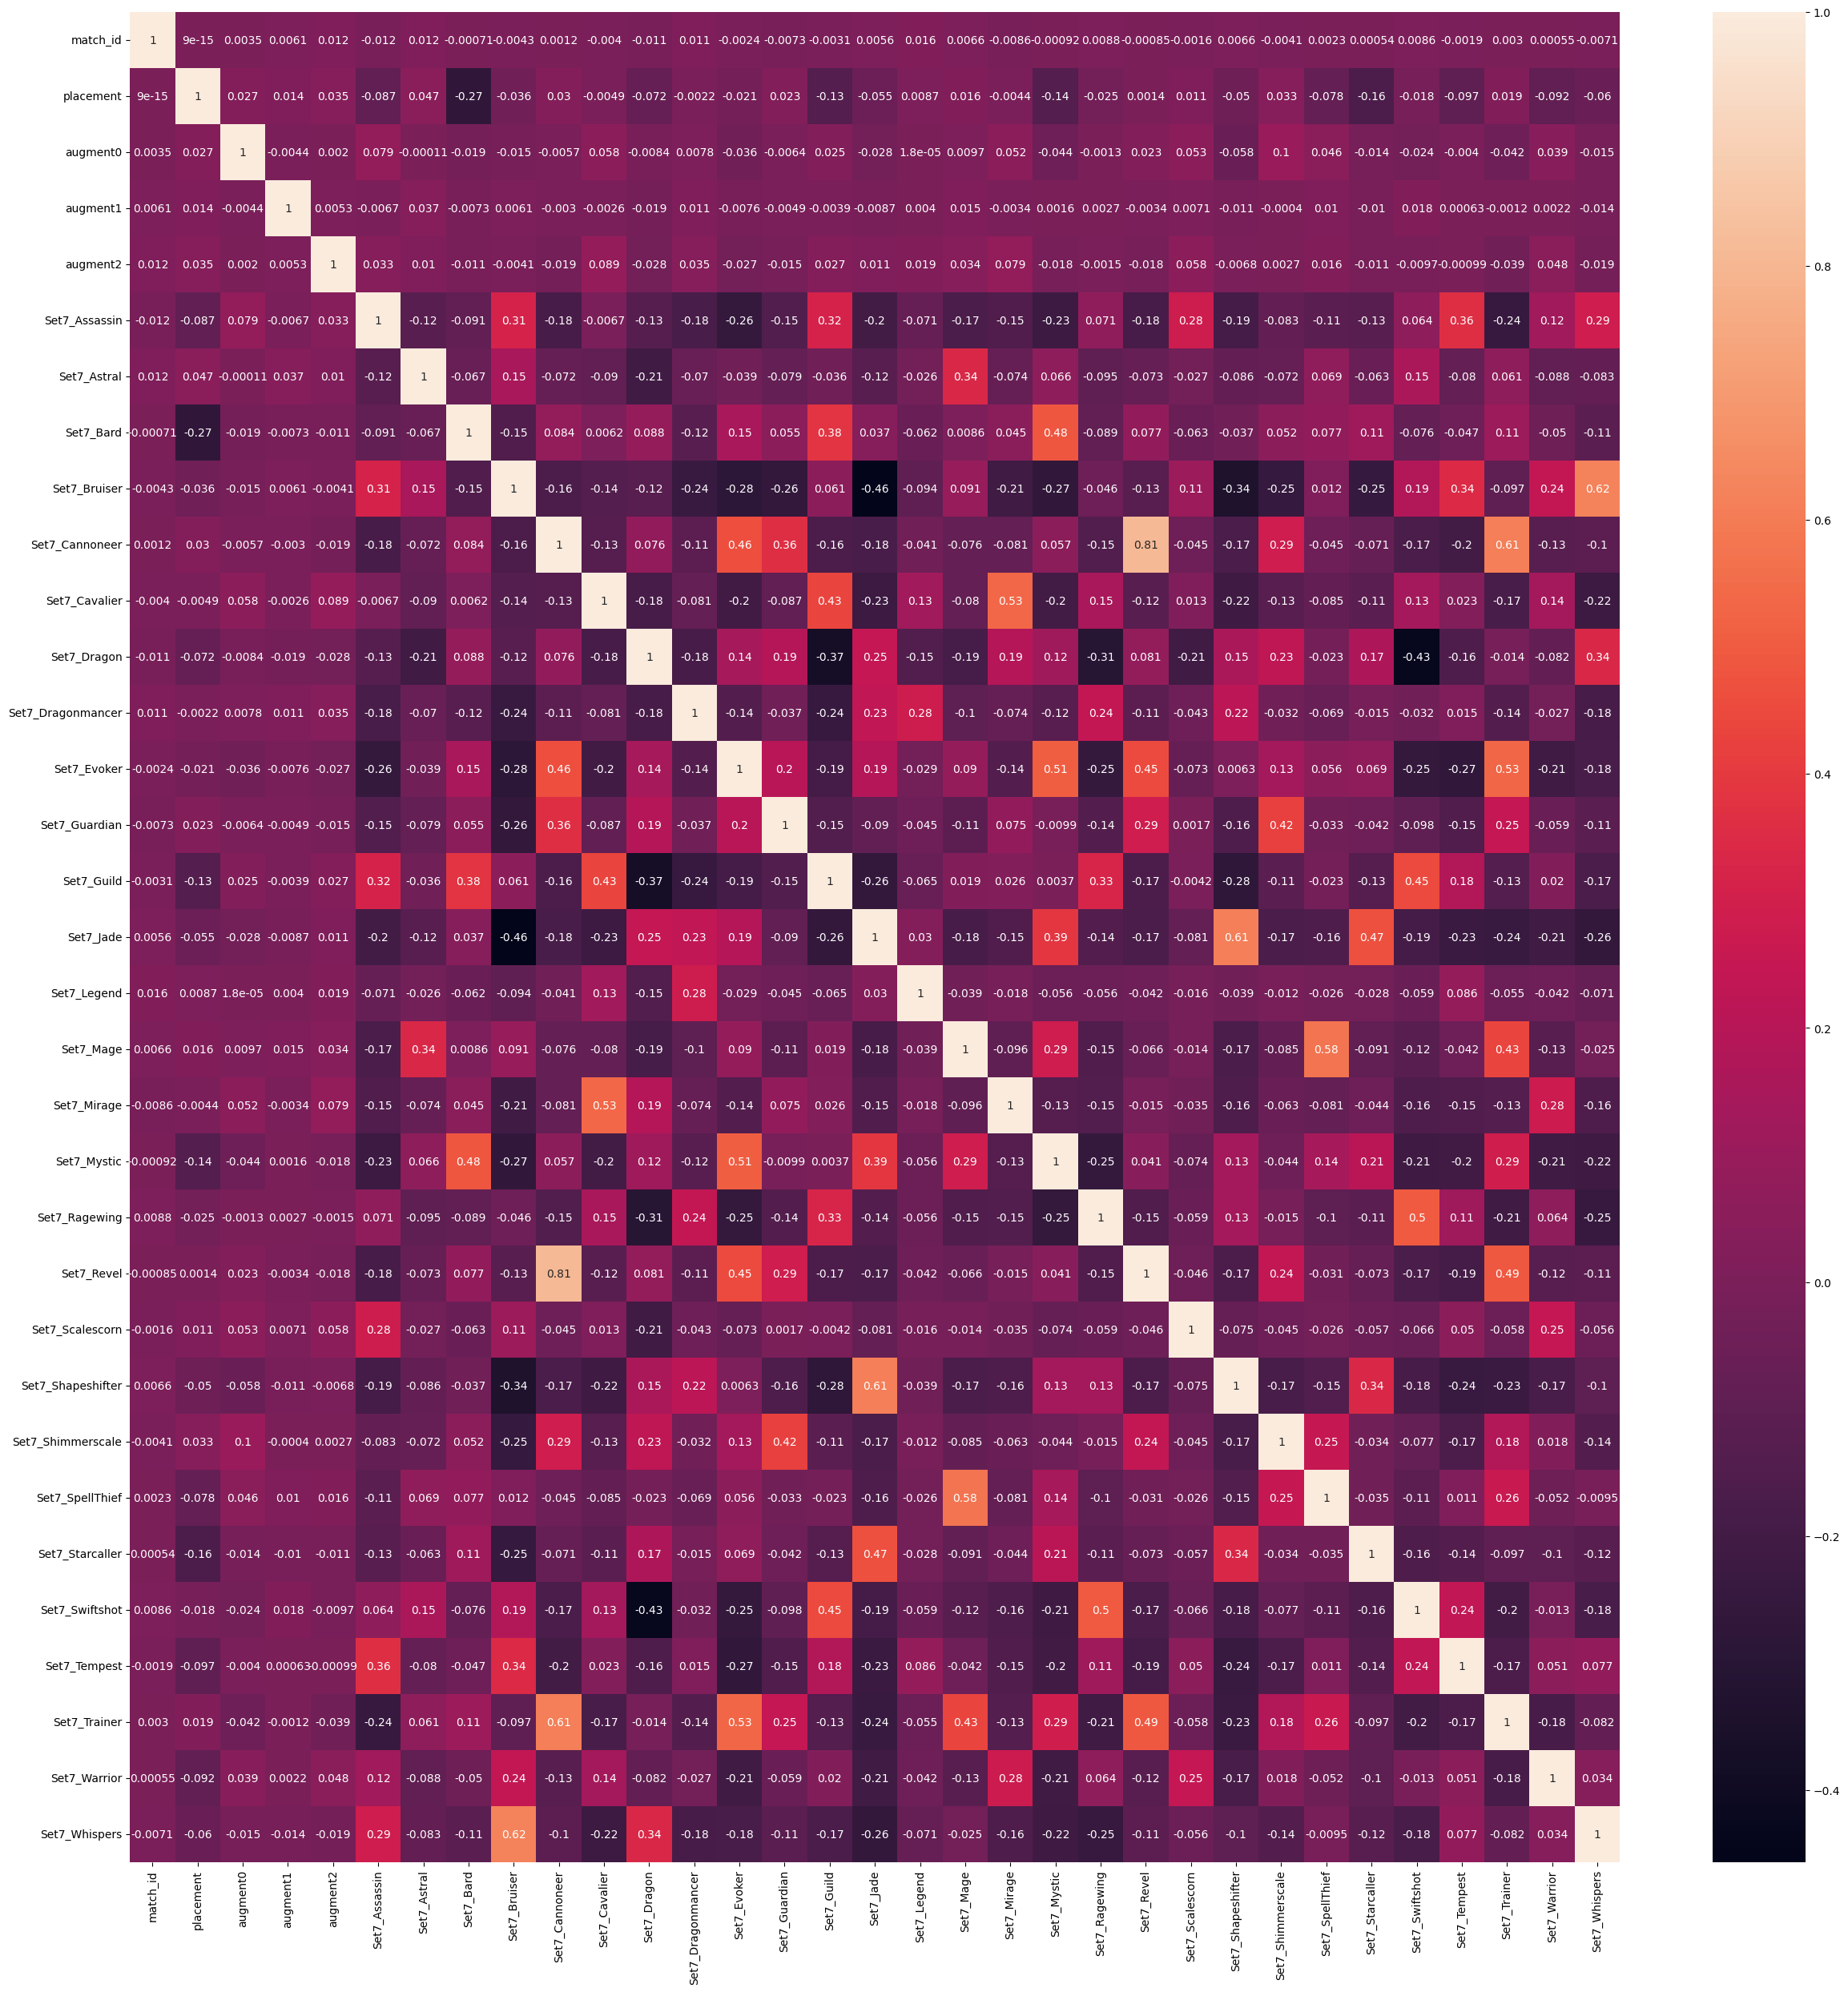

In [3]:
limpieza(plot=4)

en los siguientes graficos se puede preseciar como influye el nivel de la sinergia a la hora del juego, estas variaran segun el tipo de bufo que esta de, cabe mencionar que mientas más alto el nivel de sinergia más fuerte sera la misma.

Se puede observar que en mientras mas alto el nivel hay una disminucion considerable de las personas que lo juegan, esto es debido que para alcanzarlo es necesario sacrificar otras posibles combinaciones que existen .

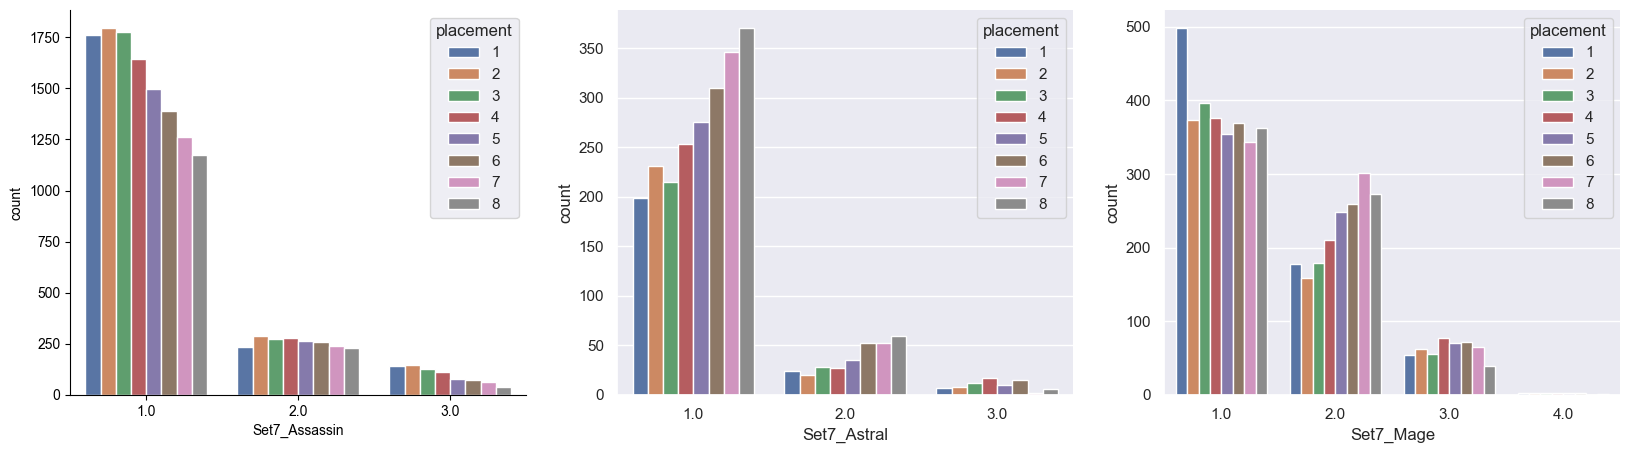

In [2]:
limpieza(plot=1)

Se puede visualizar que los aumentos estan mayormente distribuidos hacia la el tipo uno que son los de combate, esto es debido a que son mas comunes que los otros dos. 

Otro dato importante que los aumentos sinergicos (#3) presentan una caid en donde los primeros puestos son menos comunes esto se debe a que requieren mayor habilidad para usarlos y mejor planteamiento de la partida.

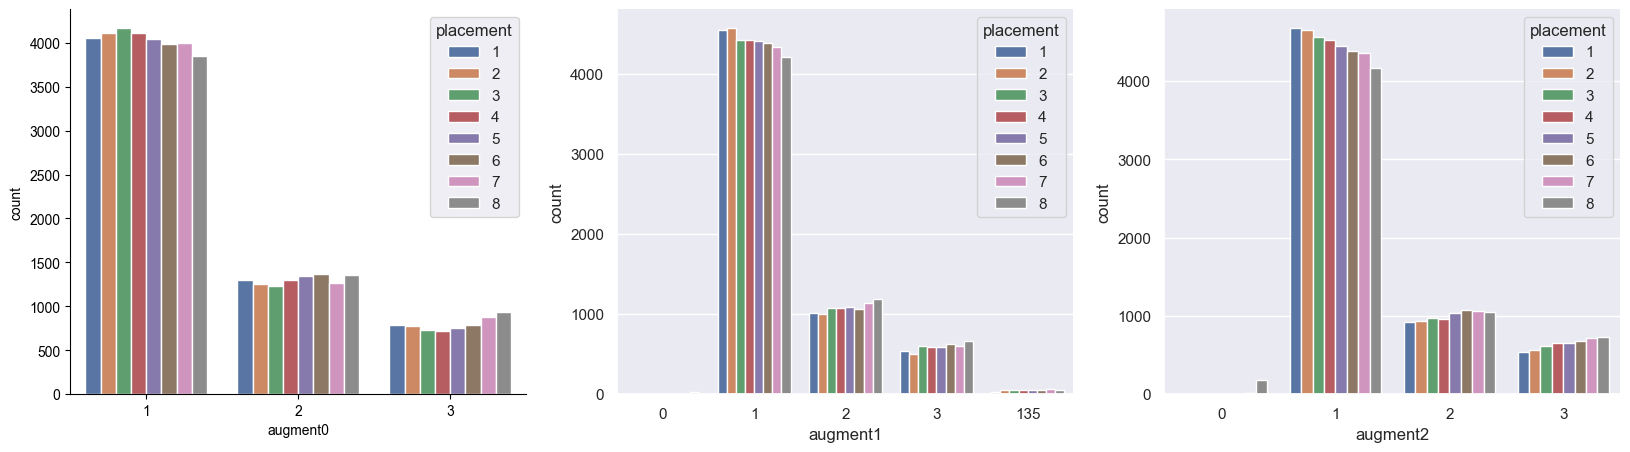

In [4]:
limpieza(plot=2)

En estos graficos se puede presenciar como el nivel de ascencion (conocido en el juego como estrellas) puede generar un diferencia a la hora de proyectar las posiciones al final del encuentro.

Todas las que se muestran aqui son legendarias y se presecian que jay un power spike entre la ficha sin ascencion y aquellas que si tienen ascencion

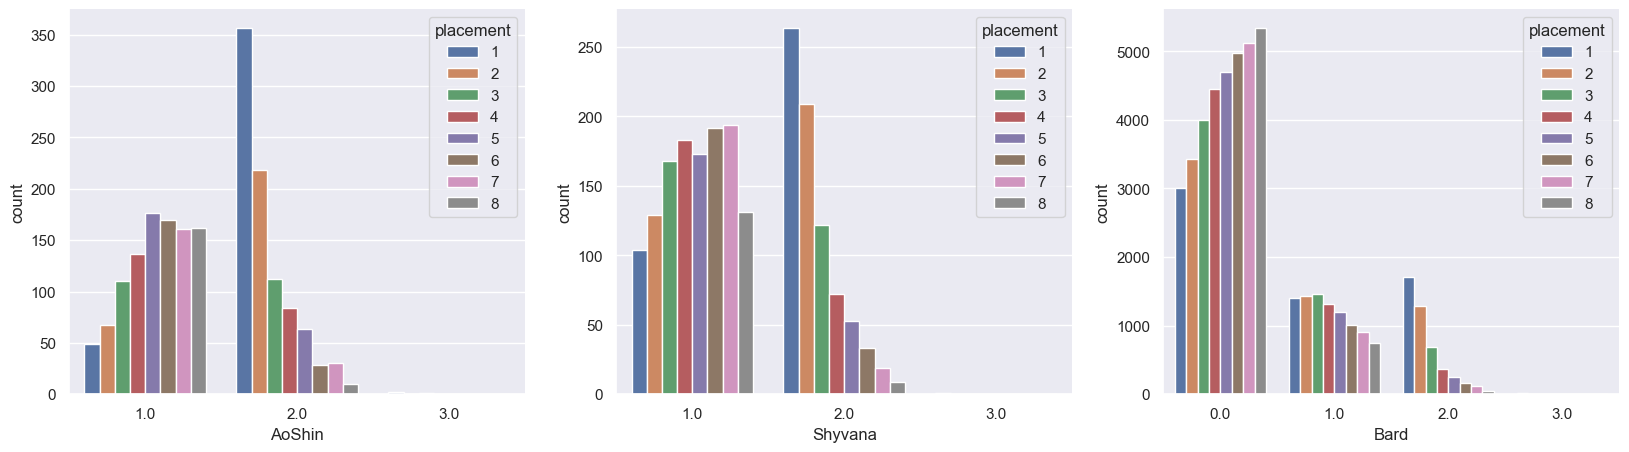

In [4]:
limpieza(plot=3)

A la hora de procesar los datos se decidio eliminar el nombre de los objetos para cambiarlos por la cantidad, si bien en un principio se pudo haber planteado darle un valor a cada obejeto se rechazo la idea ya que solo iba aumentar la complejidad del modelo sin aportar un cambio signid¡ficativo. Ademas podrian estar pensando que el tipo de objetos que tenga el campeon ocasionara diferentes efectos en la paratida y en efecto tienen razon, pero gracias a que el data set fue sacado de partidas challenger (el mayor nivel competitivo posible) asumimos que son los items mejor optimizados para la ocasion.

Otro cambio parecido sucedio con los aumentos, que si bien sucede lo mismo, estos los separamos por categorias (las cuales ya fueron explicadas) para poder manejar el modelo de manera más simple

A parte de todo estos, todas las variables fueron puestas de transformadas a un formato int y float debido a que se va a realizar un modelo de caracter clasificatorio debido a que no son variables continuas.

Cabe recalcar que los posicionamientos al final de la partida solo cuenta con los tres primeros puestos como 1 y los demas como 0, esto es debido a que apartir del 3 puesto comienzas a sumar puntos y a nosotros nos importa nada más que la victoria por eso no hacemos distincion entre estos 3.

In [5]:
limpieza(show=True)

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,...,TrainerDragon_item,Tristana_item,Twitch_item,Varus_item,Vladimir_item,Volibear_item,Xayah_item,Yasuo_item,Yone_item,Zoe_item
0,1,1,1,1,1,0.0,0.0,1.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,1,1,1,1,1.0,0.0,1.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,3,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
5,0,1,1,1,3,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0,1,1,1,3,2.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Para la realizacion de este proyecto se analizaron diferentes tipos de pruebas con los diferentes modelos, tanto KNN como SVM tenian una precisión 10% menor que la precision de una regresion logistica. Asumimos que es por la cantidad de variables que existen en el data set.


In [2]:
modelado()

0.8372164004476549

In [3]:
limpieza_2()

In [2]:
prediction()

### Público objetivo

Como se puede ver las predicciones son muy acertadas, y queremos llevar este servicio a aquellos jugadores que busquen mejorar su nivel de juego, creemos que va a ser una herramienta util a la hora de jugar más no favorecemos la idea a que se depnda exclusivamente de esta, es necesario desarrollar un pensamiento crítico y que esta reafirme aquella hipotesis que el jugador se haya planteado.

### Planes al futuro

Nos gustaria llevar el proyecto mas alla del nivel en el que se encuentra ahora, lo planeamos hacer tomando todas aquellas variables que en su momento no se tomaron en cuenta y que podrian ser criticas a la hora de jugar una partida, tanto los items como los aumentos y el pocisionamiento. tomando en cuenta los buffos que estos pueden tener en las fichas y como la posicion puede perjudicar o beneficiar a la hora de jugar.

gracias por confiar en nosotros en este primer paso de este gran proyecto y espero que nuestros avances hayan sido de su agrado

ATTE. jefe del equipo de desarrolladores.